In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
df = pd.read_csv('dataset.csv', encoding=('ISO-8859-1'))

In [4]:
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES ï¿½,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES ï¿½,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80238 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114419 non-null  object 
 7   PrimaryCategoryId       114635 non-null  int64  
 8   PrimaryCategory         114635 non-null  object 
 9   SubCategoryId           114635 non-null  int64  
 10  SubCategory             114635 non-null  object 
 11  CasId                   114635 non-null  int64  
 12  CasNumber               108159 non-null  object 
 13  ChemicalId              114635 non-null  int64  
 14  ChemicalName        

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CDPHId,114635.0,20304.858987,12489.052554,2.0,8717.0,20895.0,31338.50,41524.0
CSFId,80662.0,32608.658377,19089.443910,1.0,15789.0,32541.0,48717.75,65009.0
CompanyId,114635.0,450.641532,409.533093,4.0,86.0,297.0,798.00,1391.0
PrimaryCategoryId,114635.0,51.076294,20.474341,1.0,44.0,44.0,59.00,111.0
SubCategoryId,114635.0,66.819252,35.822097,3.0,48.0,52.0,65.00,172.0
CasId,114635.0,674.094107,149.214101,2.0,656.0,656.0,656.00,1242.0
ChemicalId,114635.0,32837.556959,20439.412299,0.0,13990.0,32055.0,51578.50,68074.0
ChemicalCount,114635.0,1.288359,0.636418,0.0,1.0,1.0,1.00,9.0


In [7]:
df.shape

(114635, 22)

In [8]:
df.isnull().sum()

CDPHId                         0
ProductName                    0
CSFId                      33973
CSF                        34397
CompanyId                      0
CompanyName                    0
BrandName                    216
PrimaryCategoryId              0
PrimaryCategory                0
SubCategoryId                  0
SubCategory                    0
CasId                          0
CasNumber                   6476
ChemicalId                     0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
dtype: int64

In [9]:
df.select_dtypes(include='int64').nunique()

CDPHId               36972
CompanyId              635
PrimaryCategoryId       13
SubCategoryId           92
CasId                  134
ChemicalId           58079
ChemicalCount           10
dtype: int64

In [10]:
df.select_dtypes(include='object').nunique()

ProductName               33716
CSF                       34244
CompanyName                 606
BrandName                  2714
PrimaryCategory              13
SubCategory                  89
CasNumber                   125
ChemicalName                123
InitialDateReported        2274
MostRecentDateReported     2178
DiscontinuedDate            991
ChemicalCreatedAt          2320
ChemicalUpdatedAt          2326
ChemicalDateRemoved         524
dtype: int64

In [11]:
#drop the duplicated values
df.drop_duplicates()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES ï¿½,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES ï¿½,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,5,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68059,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114631,4,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68060,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114632,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68061,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1
114633,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,13463-67-7,68062,Titanium dioxide,06/19/2020,06/19/2020,NaN,06/19/2020,06/19/2020,NaN,1


# Data Cleaning

**Data Dictionary**

*   **CDPHId** - The California Department of Public Health (CDPH) internal identification number for product. Note that the CDPHId may appear more than once if a product has more than one Color/Scent/Flavor, more than one Category, or more than one Chemical Name/CAS number reported.
*   **ProductName** - Product name as entered by manufacturer, packer and/or distributor. The product name is entered as free-text into the reporting database and may contain misspellings or other errors.
*   **CSFId** - CDPH internal identification number for a color/scent/flavor.
*   **CSF** - Color, scent and/or flavor as entered by manufacturer, packer and/or distributor. The color/scent/flavor name is entered as free-text into the reporting database and may contain misspellings or other errors. Not all products have specific colors, scents or flavors.
*   **CompanyId** - CDPH internal identification number for company.
*   **CompanyName** - Company name as entered by manufacturer, packer and/or distributor. The company name is entered as free-text into the reporting database and may contain misspellings or other errors.
*   **BrandName** - Brand name as entered by manufacturer, packer and/or distributor. The brand name is entered as free-text into the reporting database and may contain misspellings or other errors.
*   **PrimaryCategoryId** - CDPH internal identification number for category.
*   **PrimaryCategory** - Type of product (13 primary categories: Baby Products, Bath Products, Fragrances, Hair Care Products (non-coloring), Hair Coloring Products, Makeup Products (non-permanent), Nail Products, Oral Hygiene Products, Personal Care Products, Shaving Products, Skin Care Products, Sun-Related Products, Tattoos and Permanent Makeup). See attachment for sub-categories within each primary category (Cosmetics-Chemicals-CA-CDPH-DataDictionary-Subcategories.csv).
*   **SubCategoryId** - CDPH internal identification number for subcategory.
*   **SubCategory** - Type of product within one of the 13 primary categories. See attachment for sub-categories within each primary category (Cosmetics-Chemicals-CA-CDPH-DataDictionary-Subcategories.xls).
*   **CASId** - CDPH internal identification number for chemical.
*   **CasNumber** - Chemical Abstracts Service registry numbers of the reported chemical ingredients, names of reported chemical ingredients, the number of reported chemicals for each product, and dates of reporting, product discontinuation or reformulation if applicable.
*  **ChemicalId** - CDPH internal identification number for this chemical's record specific to this product.
*   **ChemicalName** - Name of chemical substance in cosmetic product. Note that chemical substances may have more than one Chemical Name. What appears here is the chemical name selected by the manufacturer, packer and/or distributor. The California Safe Cosmetics Act  requires cosmetics companies to report products containing ingredients known or suspected to cause cancer or developmental or reproductive harm.
*   **InitialDateReported** - Date the product profile was created by manufacturer, packer and/or distributor, that is, the date that the product was first reported to CDPH.
*   **MostRecentDateReported** - Date the product profile was last modified by manufacturer, packer and/or distributor. The product profile contains all information about the product with the exception of chemical information, which is stored separately. This field defaults to the InitialDateReported value initially.
*   **DiscontinuedDate** - If applicable, date the product was discontinued.
*   **ChemicalCreatedAt** - The date that this chemical was first reported to CDPH for this product.
*   **ChemicalUpdatedAt** - Date this chemical report was last modified by manufacturer, packer and/or distributor. This field is unique from the product profile. This field defaults to the ChemicalCreatedAt value initially.
*   **ChemicalDateRemoved** - If applicable, date the chemical was removed from product, i.e., reformulation.
*   **ChemicalCount** - Total number of current chemicals reported for this product. This number does not include chemicals that have been removed from a product. This number is a calculated field based on current reporting.
*   **primary key** - These fields together are the unique identifier for an individual product/chemical profile: CDPHId, CSFId, SubCategoryId, ChemicalId















<Axes: >

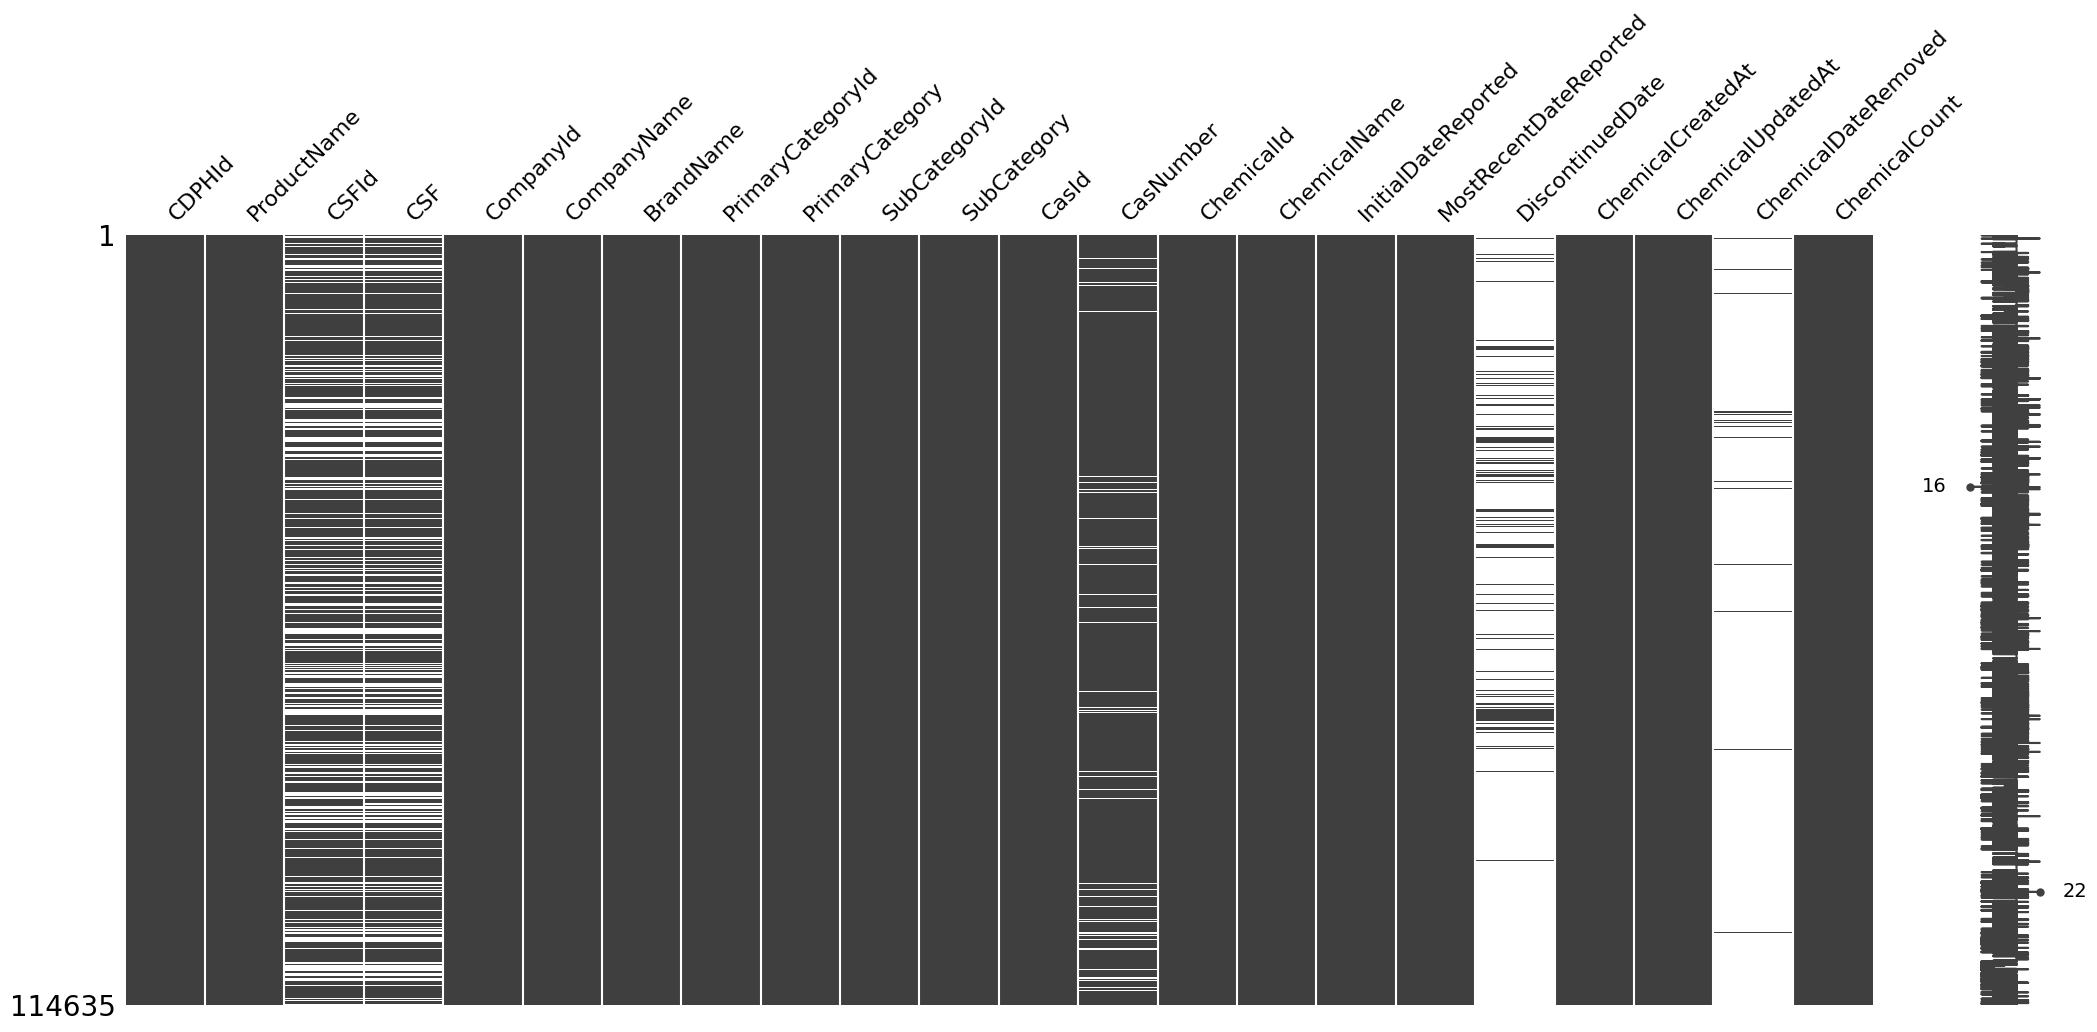

In [12]:
msno.matrix(df)

Data has missing values in "CSFId", "CSF", "CASNumber", "DiscontinuedDate" and "ChemicalDateRemoval" columns.

In [13]:
print("Unique number of CDPHId: ",len(df['CDPHId'].unique()))
print("Unique number of product names: ",len(df['ProductName'].unique()))
print("Unique number of comapny names: ",len(df['CompanyName'].unique()))
print("Unique number of Brand names: ",len(df['BrandName'].unique()))
print("Unique number of primary category: ",len(df['PrimaryCategory'].unique()))
print("Unique number of sub category: ",len(df['SubCategory'].unique()))
print("Unique number of chemical names: ",len(df['ChemicalName'].unique()))

Unique number of CDPHId:  36972
Unique number of product names:  33716
Unique number of comapny names:  606
Unique number of Brand names:  2715
Unique number of primary category:  13
Unique number of sub category:  89
Unique number of chemical names:  123


# Data Analysis

In [14]:
below_five = df[df["ChemicalCount"]<5]
below_five.shape

(114411, 22)

In [15]:
above_five = df[df["ChemicalCount"]>=5]
above_five.shape
sorted_df = above_five.sort_values(by='ChemicalCount', ascending=False)

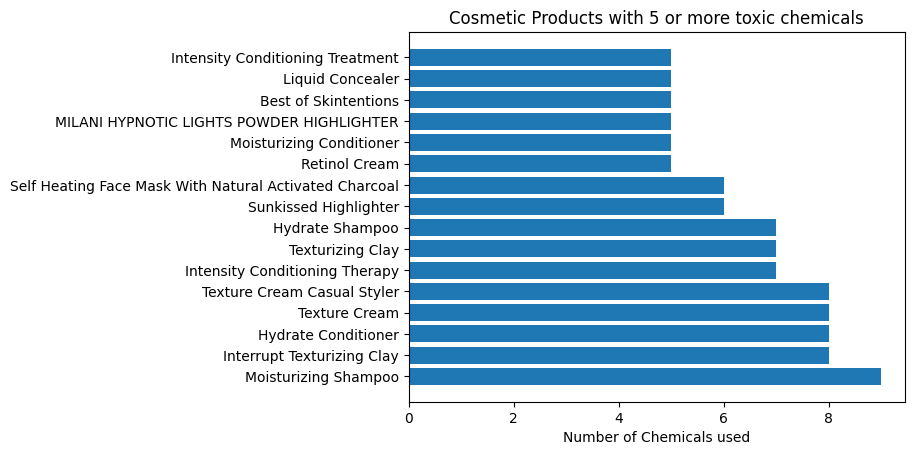

In [16]:
#plt.figure(figsize = (10,15))
plt.barh(sorted_df['ProductName'],sorted_df['ChemicalCount'])
plt.xlabel("Number of Chemicals used")
plt.title("Cosmetic Products with 5 or more toxic chemicals")
plt.show()

Hair and skin care products seem to use a lot of toxic chemicals compared to other products;

In [17]:
average_chemicals_per_brand = df.groupby('BrandName')['ChemicalCount'].mean().reset_index()
average_chemicals_per_brand = average_chemicals_per_brand[average_chemicals_per_brand["ChemicalCount"]>=3]
average_chemicals_per_brand = average_chemicals_per_brand.sort_values(by='ChemicalCount', ascending=False)
print(average_chemicals_per_brand)

                              BrandName  ChemicalCount
1524                         Mastercuts       6.363636
1917                  Regis Design Line       5.867347
552                            Careline       4.461538
772             Dermaquest Skin Therapy       4.000000
1744                           PALLADIO       4.000000
2630                              Zoeva       4.000000
749                       Dermaminerals       4.000000
661                         Costcutters       4.000000
1806                     Perfectly Pure       3.600000
2543                      Vitamin World       3.375000
596                       Chrome Hearts       3.227273
1029                    Good 'N Natural       3.000000
1088                     Handi-Freshï¿½       3.000000
1435                    Luxury Lush Pud       3.000000
1476       MENS NULL Hair Remover Cream       3.000000
671   Cover Your Gray / Cover That Gray       3.000000
610         Claudia Stevens - CTG / CYG       3.000000
2449      

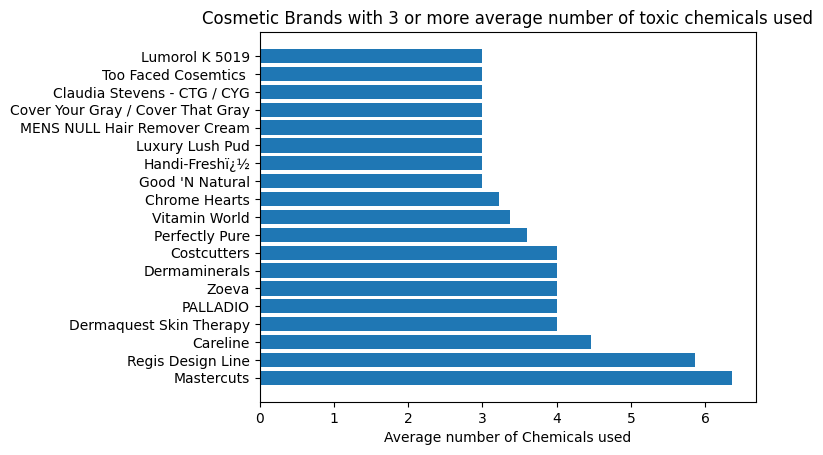

In [18]:
#plt.figure(figsize = (10,15))
plt.barh(average_chemicals_per_brand['BrandName'],average_chemicals_per_brand['ChemicalCount'])
plt.xlabel("Average number of Chemicals used")
plt.title("Cosmetic Brands with 3 or more average number of toxic chemicals used")
plt.show()

Mastercuts, Redis Design Line and Careline brands seem to use more than 4 toxic chemicals in average in most of their products. It's best to avoid buying any products from these brands.

In [19]:
average_chemicals_per_company = df.groupby('CompanyName')['ChemicalCount'].mean().reset_index()
average_chemicals_per_company = average_chemicals_per_company[average_chemicals_per_company["ChemicalCount"]>=3]
average_chemicals_per_company = average_chemicals_per_company.sort_values(by='ChemicalCount', ascending=False)
print(average_chemicals_per_company)

             CompanyName  ChemicalCount
451    Regis Corporation       4.803571
126      Cosmopharm Ltd.       4.461538
564  Vitamin World, Inc.       3.303030
112    Chrome Hearts LLC       3.227273
206      Good 'N Natural       3.000000


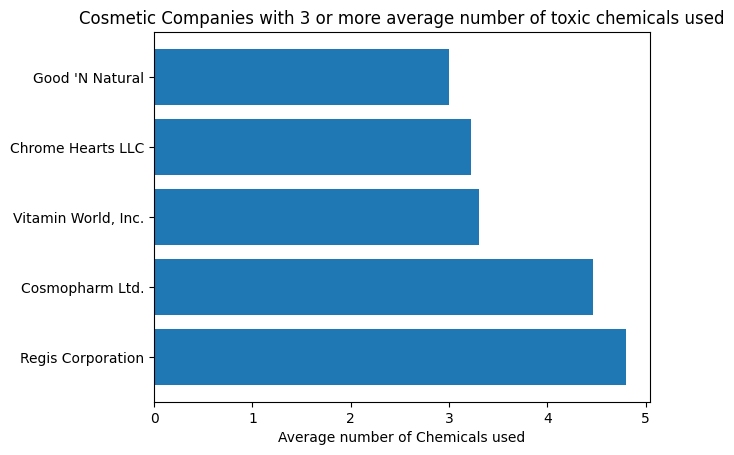

In [20]:
plt.barh(average_chemicals_per_company['CompanyName'],average_chemicals_per_company['ChemicalCount'])
plt.xlabel("Average number of Chemicals used")
plt.title("Cosmetic Companies with 3 or more average number of toxic chemicals used")
plt.show()

Regis Corporation and Cosmopharm Ltd. seems to be using the highest number of chemicals in average in their products. It's best to avoid them.

In [21]:
df['ProductCount'] = df.groupby('CompanyName')['ProductName'].transform('count')
no_of_products_per_company = df[df["ProductCount"]>=4000]

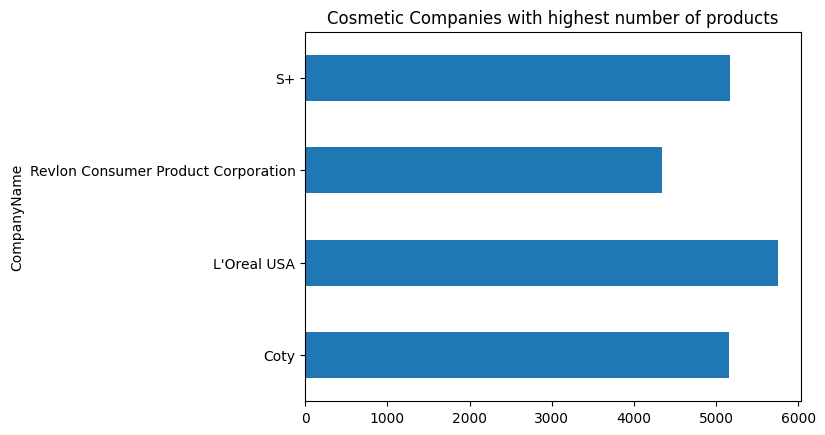

In [22]:
no_of_products_per_company.groupby('CompanyName').size().plot(kind='barh')
plt.title("Cosmetic Companies with highest number of products")
plt.show()

L'Oreal USA, S+ and Coty seems to be producing the highest number of products

In [23]:
df['ProductCount_Brand'] = df.groupby('BrandName')['ProductName'].transform('count')
no_of_products_per_brand = df[df["ProductCount_Brand"]>=3000]

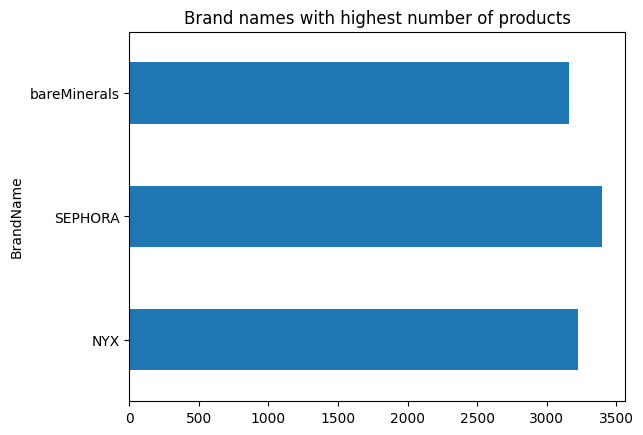

In [24]:
no_of_products_per_brand.groupby('BrandName').size().plot(kind='barh')
plt.title("Brand names with highest number of products")
plt.show()

Sephora and NYX seems to be having the highest number of products.

In [25]:
df['f'] = df.groupby('ChemicalName')['ChemicalName'].transform('count')
df['logf'] = [np.log10(i) for i in (df['f'])]
sorted_df = df.sort_values(by='logf', ascending=False)

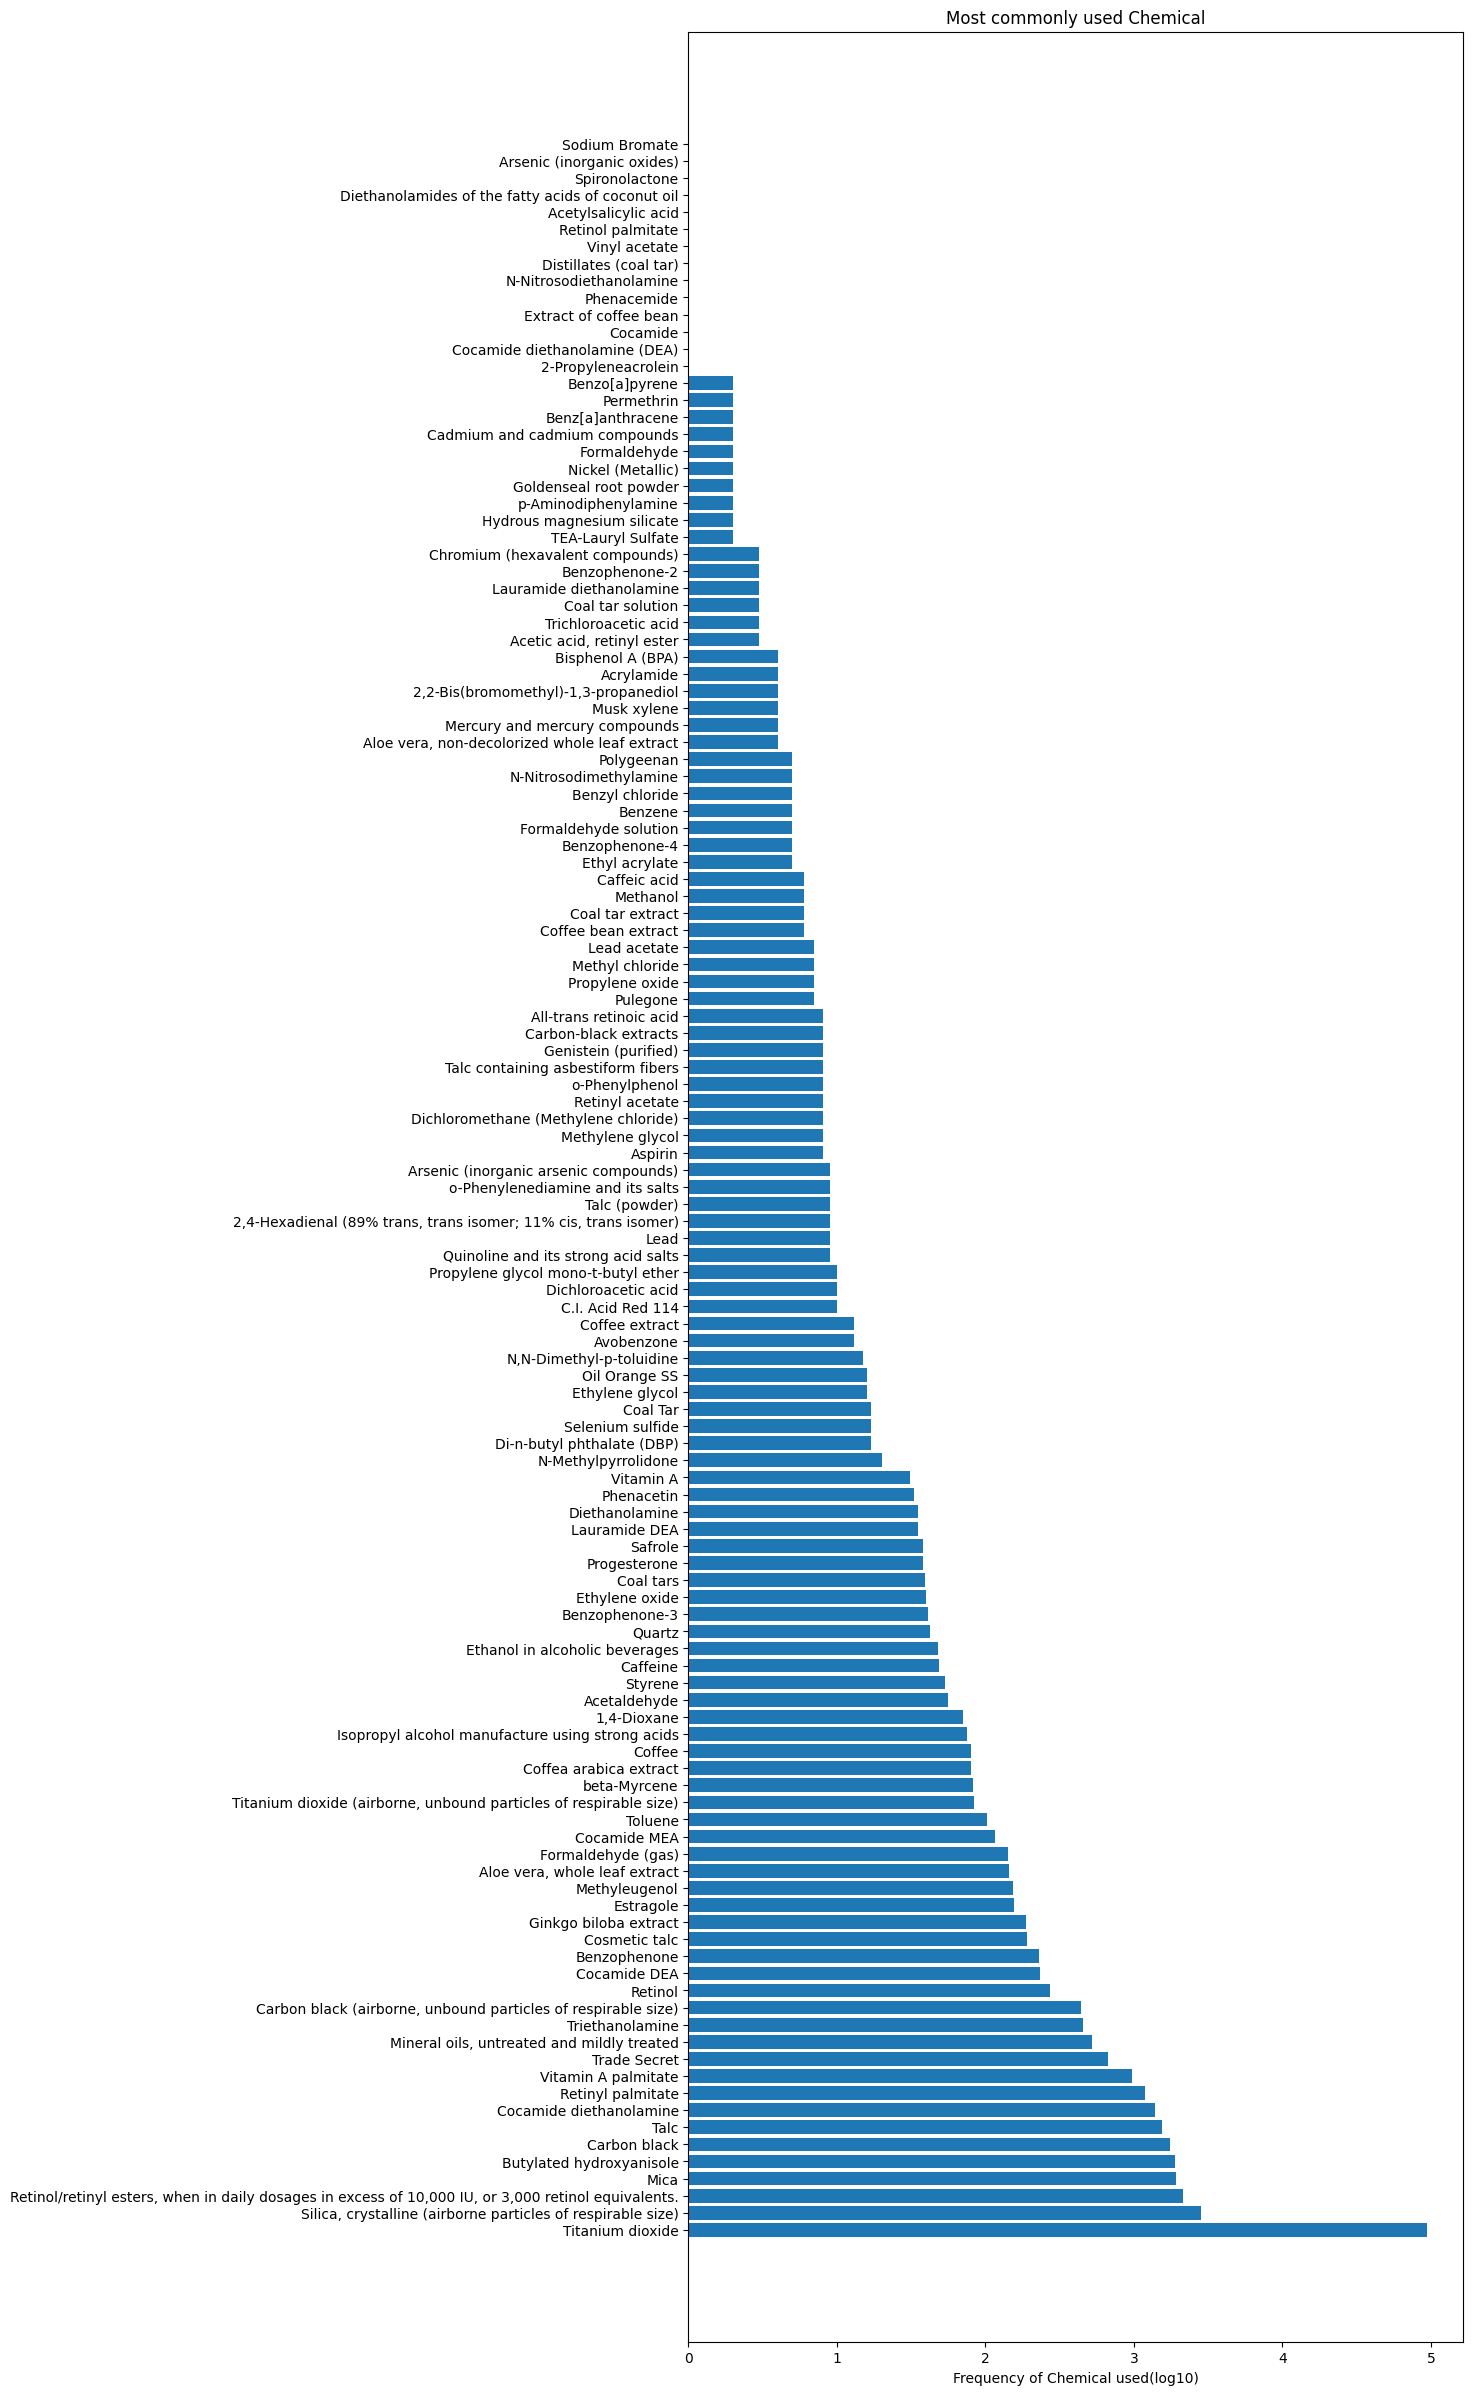

In [26]:
plt.figure(figsize = (10,30))
plt.barh(sorted_df['ChemicalName'],sorted_df['logf'])
plt.xlabel("Frequency of Chemical used(log10)")
plt.title("Most commonly used Chemical")
plt.show()

Titanium Oxide seems to be contained in most of the products. While the exact harms aren't well understood. Studies have shown that it is considered possibly carcinogenic to humans when inhaled by the International Agency for Research on Cancer.

In [27]:
df['Primary_Count'] = df.groupby('PrimaryCategory')['PrimaryCategory'].transform('count')
sorted_df = df.sort_values(by='Primary_Count', ascending=False)
df

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount,ProductCount,ProductCount_Brand,f,logf,Primary_Count
0,41524,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,02/01/2011,07/09/2009,07/09/2009,NaN,1,762,507.0,93480,4.970719,75827
1,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,NaN,07/01/2009,07/01/2009,NaN,2,41,3.0,1,0.000000,1620
2,41523,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,NaN,07/02/2009,07/02/2009,NaN,2,41,3.0,156,2.193125,1620
3,41523,PRECISION GLIMMER EYE LINER-ALL SHADES ï¿½,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,NaN,07/09/2009,07/09/2009,NaN,1,762,507.0,93480,4.970719,75827
4,41523,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES ï¿½,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,02/01/2011,07/09/2009,07/09/2009,NaN,1,762,507.0,93480,4.970719,75827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114630,5,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65001.0,Rosa Soft,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,NaN,06/19/2020,06/19/2020,NaN,1,169,12.0,93480,4.970719,75827
114631,4,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65002.0,Malva Spirit,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,NaN,06/19/2020,06/19/2020,NaN,1,169,12.0,93480,4.970719,75827
114632,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65003.0,Rojo Fashion,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,NaN,06/19/2020,06/19/2020,NaN,1,169,12.0,93480,4.970719,75827
114633,3,HYDRA-LIP TRANSLUCENT COLOR LIPSTICK,65004.0,Terra Mystic,1259,"Yanbal USA, Inc",YANBAL,44,Makeup Products (non-permanent),53,...,NaN,06/19/2020,06/19/2020,NaN,1,169,12.0,93480,4.970719,75827


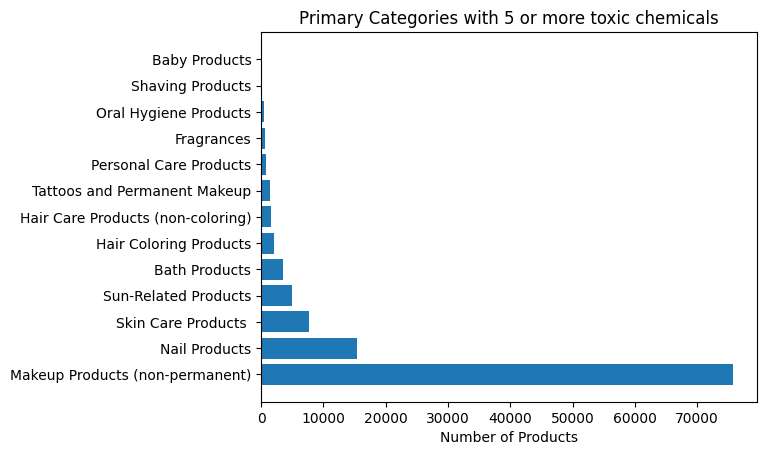

In [28]:
plt.barh(sorted_df['PrimaryCategory'],sorted_df['Primary_Count'])
plt.xlabel("Number of Products")
plt.title("Primary Categories with 5 or more toxic chemicals")
plt.show()

Makeup Products seem to be using the highest number of chemicals and Baby products to be the least.

# Conclusion

*   Most of the famous cosmetic companies use toxic chemicals in their products. It's best to check the ingredients before purchasing these items.
*   Makeup products have the highest amount of chemicals compared to other products. Among them, hair and skin care products have the highest concentrations.
*   Titanium dioxide is used in the majority of the products.





